In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class IMG:
    def __init__(self,name,mark=None):
        self.path ='D:\graduated\Image_process\lab\PGM_images\\' 
        self.savepath='D:\graduated\Image_process\lab\lab_report\lab7\python\\'
        self.name = name
        self.prop= '.pgm'
        self.mark=mark
        #self.img=None
        
    def load(self):
        self.imapath=self.path+self.name+self.prop
        self.img=np.float64(cv2.imread(self.imapath,0))
        self.save(self.img,'original')
        return self.img
    def save(self,img,mark=None):
        img=cv2.equalizeHist(np.uint8(img))
        self.mark=mark
        savepath=self.savepath+self.name+'_'+self.mark+'.jpg'
        cv2.imwrite(savepath,img)
        return img
    
    def disp(self,winName,img,sizeflag=cv2.WINDOW_NORMAL):
      
        img=cv2.equalizeHist(np.uint8(img))
        if sizeflag==1:
            sizeflag=cv2.WINDOW_AUTOSIZE
        cv2.namedWindow(winName,sizeflag)
        cv2.imshow(winName,img) 
        cv2.waitKey(0)
        cv2.destroyWindow(winName)
        return img
    def psave(self,img,mark=None,cb=0):
        fig = plt.gcf() 
        plt.imshow(img,cmap='gray')
        if cb:
            plt.colorbar()
        plt.xticks([]), plt.yticks([])
        savepath=self.savepath+self.name+'_'+mark+'.jpg'
        fig.savefig(savepath,dpi=500,bbox_inches='tight')
        plt.close()
    def fsave(self,fig,mark=None):
        #plt.xticks([]), plt.yticks([])
        savepath=self.savepath+self.name+'_'+mark+'.jpg'
        fig.savefig(savepath,dpi=500,bbox_inches='tight')

def sfft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift
def isfft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return img_back

Lena=IMG('cameraWithNoise') #'cameraWithNoise' 'LenaWithNoise'
lena=Lena.load()

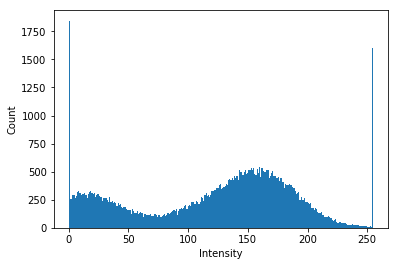

In [3]:
fig = plt.gcf() 
plt.hist(Lena.img.ravel(),256);
plt.xlabel('Intensity')
plt.ylabel('Count')
Lena.fsave(fig,mark='hist')



In [4]:
ret, mask_max = cv2.threshold(Lena.img, 254,255, cv2.THRESH_BINARY)# select 高于254为1， 保留的部分为0
ret, mask_min = cv2.threshold(Lena.img, 1,255, cv2.THRESH_BINARY)# select 高于254为1， 保留的部分为0
mask_ima = cv2.bitwise_xor(mask_min ,mask_max)
mask_noise=cv2.bitwise_not(mask_ima )
#noise = cv2.bitwise_and(Lena.img,Lena.img,mask = mask_noise)
noise=mask_ima *0+100+mask_min+mask_max
Lena.psave(noise,mark='noise')

conima=np.float64( cv2.copyMakeBorder(Lena.img,1,1,1,1,cv2.BORDER_CONSTANT,value=0))
rimg=np.zeros(Lena.img.shape)
for x in range(Lena.img.shape[0]):
    for y in range(Lena.img.shape[1]):
        if mask_noise[x,y]:
            
            sum=conima[x,y]+conima[x,y+1]+conima [x,y+2]+conima[x+1,y]+conima[x+1,y+2]+conima[x+2,y]+conima[x+2,y+1]+conima[x+2,y+2]
            if x==0 or x==Lena.img.shape[0]:
                m=5
                if y==0 or y==Lena.img.shape[1]:
                    m=3
            else:
                    if y==0 or y==Lena.img.shape[1]:
                        m=5
                    else:
                        m=8
            rimg[x,y]=sum/m
        else:
            rimg[x,y]=conima[x+1,y+1]
Lena.psave(rimg,mark='denoise')

In [5]:
Lena=IMG('LenaWithNoise') #'cameraWithNoise' 'LenaWithNoise'
lena=Lena.load()

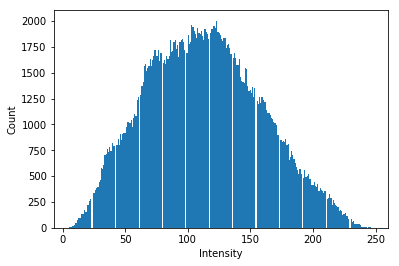

In [6]:
fig = plt.gcf() 
plt.hist(Lena.img.ravel(),256);
plt.xlabel('Intensity')
plt.ylabel('Count')
Lena.fsave(fig,mark='hist')

In [7]:
sft=sfft(Lena.img)
log_ft=np.log(np.abs(sft))
Lena.psave(log_ft,mark='fft_log')

In [8]:
rows, cols = Lena.img.shape
crow,ccol = int(rows/2) , int(cols/2)
d=70;
mask=np.zeros(Lena.img.shape)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1
mask_sft=mask*sft
rimg=isfft(mask_sft)
Lena.psave(mask,'mask_70')
Lena.psave(np.log(np.abs(mask_sft)+1),'mask_sft')
Lena.psave(np.abs(rimg),'demoise')
        
        

In [9]:
#arithmetic mean filter,
def AMF(img,m,n):
    rimg=np.zeros((int(Lena.img.shape[0]-m+1),int(Lena.img.shape[1]-n+1)))
    for x in range(rimg.shape[0]):
        for y in range(rimg.shape[1]):
            sum=0;
            for M in range(m):
                for N in range(n):
                    sum+=img[x+M,y+N]
            val=sum/(m*n)
            rimg[x,y]=val
    return rimg


# Geometric mean filter
def GMF(img,m,n):
    rimg=np.zeros((int(Lena.img.shape[0]-m+1),int(Lena.img.shape[1]-n+1)))
    for x in range(rimg.shape[0]):
        for y in range(rimg.shape[1]):
            sum=1;
            for M in range(m):
                for N in range(n):
                    sum=img[x+M,y+N]*sum
            val=pow(sum,1/(m*n))
            rimg[x,y]=val
    return rimg


#median filter
def median(img,m,n):
    rimg=np.zeros((int(Lena.img.shape[0]-m+1),int(Lena.img.shape[1]-n+1)))
    for x in range(rimg.shape[0]):
        for y in range(rimg.shape[1]):
            sum=[];
            for M in range(m):
                for N in range(n):
                    sum.append(img[x+M,y+N])
            val=np.median(sum)
            rimg[x,y]=val
    return rimg

#Alpha-trimmed mean filter
def ATMF(img,m,n,d):
    if d>m*n-1:
        d=m*n-1
    if d%2:
        l=int((d-1)/2)
        r=int(m*n-(d+1)/2)
    else:
        l=int(d/2)
        r=int(m*n-d/2)
    rimg=np.zeros((int(Lena.img.shape[0]-m+1),int(Lena.img.shape[1]-n+1)))
    for x in range(rimg.shape[0]):
        for y in range(rimg.shape[1]):
            s=[];
            for M in range(m):
                for N in range(n):
                    s.append(img[x+M,y+N])
            s=np.sort(s)
            sum=s[l:r]
            val=np.mean(sum)
            rimg[x,y]=val
    return rimg
                    
            
#adaptive median filter 
def ADMF(img,m,Smax):
    rimg=np.zeros((int(Lena.img.shape[0]-m+1),int(Lena.img.shape[1]-m+1)))
    for x in range(rimg.shape[0]):
        for y in range(rimg.shape[1]):
            s=[];
            for M in range(m):
                for N in range(m):
                    s.append(img[x+M,y+N])
            z_min=np.min(s)
            z_max=np.max(s)
            z_med=np.median(s)
            A1=z_med-z_min
            A2=z_med-z_max
            if A1>0 and A2<0:
                B1=img[x,y]-z_min
                B2=img[x,y]-z_max
                if B1>0 and B2< 0:
                    val=img[x,y]
                else:
                    val=z_med
            else:
                m+=1
                if m>Smax:
                    val=zmed
                else:
                    ATMF(img,m,Smax)
                    
            rimg[x,y]=val
    return rimg
    


In [10]:
imset=['lenaD1','lenaD2','lenaD3']
for imname in imset:
    Lena=IMG(imname) #'cameraWithNoise' 'LenaWithNoise'
    lena=Lena.load()
    fig = plt.gcf() 
    plt.hist(Lena.img.ravel(),256);
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    Lena.fsave(fig,mark='hist')
    plt.close()
    amf=AMF(lena,5,5)
    Lena.psave(amf,mark='amf')
    amf=GMF(lena,5,5)
    Lena.psave(amf,mark='gmf')
    amf=median(lena,5,5)
    Lena.psave(amf,mark='median')
    amf=ATMF(lena,5,5,10)
    Lena.psave(amf,mark='atmf')
    amf=ADMF(lena,5,10)
    Lena.psave(amf,mark='admf')